# Introductory Machine Learning: Hands-On Overview

**Welcome to Machine Learning!** 🎯

This 2-hour interactive session will guide you through the fundamentals of machine learning with hands-on examples and exercises. By the end, you'll understand core ML concepts and have practical experience with real datasets.

---

## Section 1: Introduction & Setup (0-10 min)

### Welcome and Goals

Welcome to this introductory Machine Learning session! This notebook provides a gentle overview of ML concepts through explanations and simple interactions. Our goals are to understand ML basics, explore data, and run guided examples without overwhelming you. 

**Machine learning** is a subset of AI where computers learn from data to make predictions or decisions, improving over time without explicit programming.

### Python Best Practices Reminder
- Always use **descriptive variable names**
- Add **comments** to your code
- Handle **errors gracefully**

### Virtual Environment Setup
Before starting, initialize a virtual environment to manage dependencies:
```bash
# Create virtual environment
python -m venv myenv

# Activate (Unix/Mac)
source myenv/bin/activate

# Activate (Windows)
myenv\Scripts\activate
```

This keeps your project isolated and reproducible.

**Jupyter Tip:** Use `Shift+Enter` to run cells.

---

In [9]:
# Import essential libraries for our ML journey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style for better visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the famous Iris dataset as our starting point
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

print("✅ Libraries imported successfully!")
print(f"📊 Iris dataset loaded: {iris_df.shape[0]} samples, {iris_df.shape[1]} features")
iris_df.head()

✅ Libraries imported successfully!
📊 Iris dataset loaded: 150 samples, 5 features


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Session Agenda and Resources

**Today's Journey:**
1. **What is ML?** - Definitions and core concepts
2. **Types of ML** - Supervised, unsupervised, reinforcement
3. **ML Workflow** - End-to-end process
4. **Case Study** - Customer churn prediction
5. **Algorithms** - Popular methods overview
6. **Ethics & Explainability** - Responsible AI
7. **Next Steps** - Resources for continued learning

**📚 External Resources:**
- [Google's ML Crash Course](https://developers.google.com/machine-learning/crash-course)
- [Fast.ai Practical Deep Learning](https://course.fast.ai/)

---

## Section 2: What Is Machine Learning? (10-25 min)

### Definition and Basics

**Machine learning (ML)** enables computers to learn from data and make decisions or predictions without being explicitly programmed. It differs from rule-based software by improving through experience, like a system recognizing patterns in images.

**Common problems ML solves:**
- **Prediction** (e.g., forecasting sales)
- **Classification** (e.g., spam detection)
- **Clustering** (grouping similar items)

**Analogy:** ML is like a chef tasting soup to refine recipes over time. The more they taste (data), the better they become at creating perfect dishes (predictions).

### Key Concepts:
- **Data:** The fuel that powers ML models
- **Features:** Individual measurable properties of observations
- **Patterns:** Hidden relationships in data that models learn to recognize

---

🔍 Exploring the Iris Dataset
Dataset shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


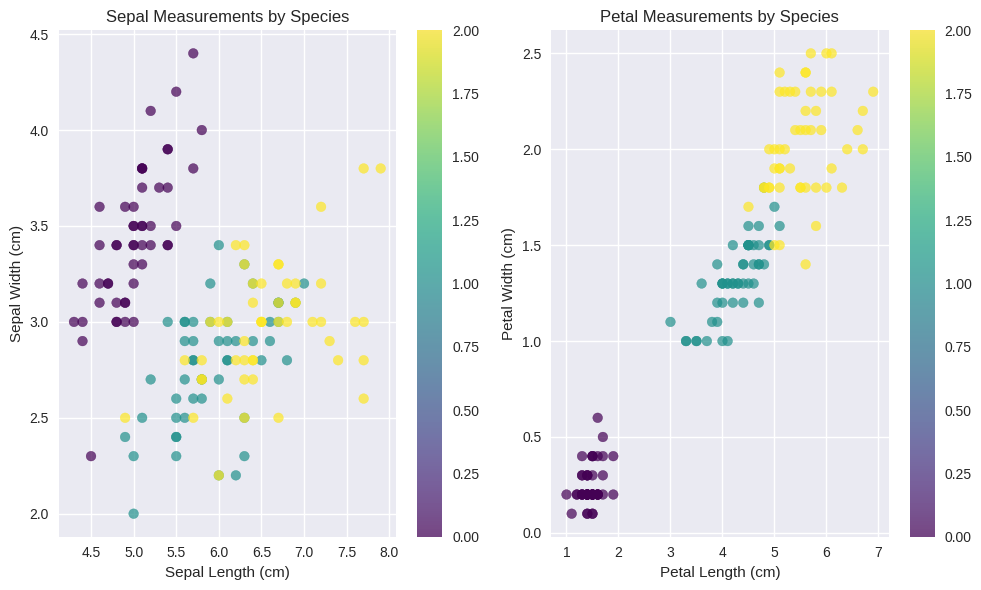


💡 Notice the patterns! Different species cluster in different regions.
This is what ML algorithms learn to recognize.


In [10]:
# Let's explore our dataset to understand what ML "sees"
print("🔍 Exploring the Iris Dataset")
print("=" * 40)

# Display basic information
print(f"Dataset shape: {iris_df.shape}")
print(f"Features: {list(iris_df.columns[:-1])}")
print(f"Target classes: {iris.target_names}")

# Create a scatter plot to visualize patterns
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
scatter = plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], 
                     c=iris_df['species'], cmap='viridis', alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Measurements by Species')
plt.colorbar(scatter)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], 
                      c=iris_df['species'], cmap='viridis', alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Measurements by Species')
plt.colorbar(scatter2)

plt.tight_layout()
plt.show()

print("\n💡 Notice the patterns! Different species cluster in different regions.")
print("This is what ML algorithms learn to recognize.")

### Exploration Prompt

Run the cell above and observe the patterns. **What do you notice?**
- Do you see distinct groups (clusters) of points?
- Which features seem most useful for distinguishing species?

This visualization shows ML's focus on finding patterns in data.

**📖 For deeper reading:** [Fast.ai ML Basics](https://course.fast.ai/Lessons/lesson1.html)

---

### 🎯 Exercise 1: Data Filtering

**Your Turn!** In the cell below, write 3-4 lines to:
1. Filter the dataset to show only flowers with petal length > 4.0 cm
2. Display the first 5 rows of the filtered data

**Expected result:** You should see fewer rows, likely from specific species.

In [11]:
# Your code here - filter dataset for petal length > 4.0



<details>
<summary><b>💡 Click here for solution</b></summary>

```python
# Filter for flowers with petal length > 4.0 cm
filtered_df = iris_df[iris_df['petal length (cm)'] > 4.0]
print(f"Filtered dataset has {len(filtered_df)} samples")
filtered_df.head()
```
</details>

---

## Section 3: Core Types of ML (25-45 min)

### Overview of ML Types

ML is divided into three main categories:

#### 1. **Supervised Learning** 🎯
- **What it is:** Learning from labeled data to predict outcomes
- **Example:** Classifying emails as spam or not spam
- **Data:** Has both input features AND known correct answers

#### 2. **Unsupervised Learning** 🔍
- **What it is:** Finding patterns in unlabeled data
- **Example:** Customer segmentation for marketing
- **Data:** Only input features, no "correct" answers

#### 3. **Reinforcement Learning** 🎮
- **What it is:** Learning through trial-and-error feedback
- **Example:** Training a game AI or autonomous vehicle
- **Data:** Actions and rewards/penalties

**Key Insight:** The type of learning depends on your data and problem!

---

🎯 SUPERVISED LEARNING DEMO
Supervised model accuracy: 82.22%
The model correctly predicted 82.2% of species!

🔍 UNSUPERVISED LEARNING DEMO


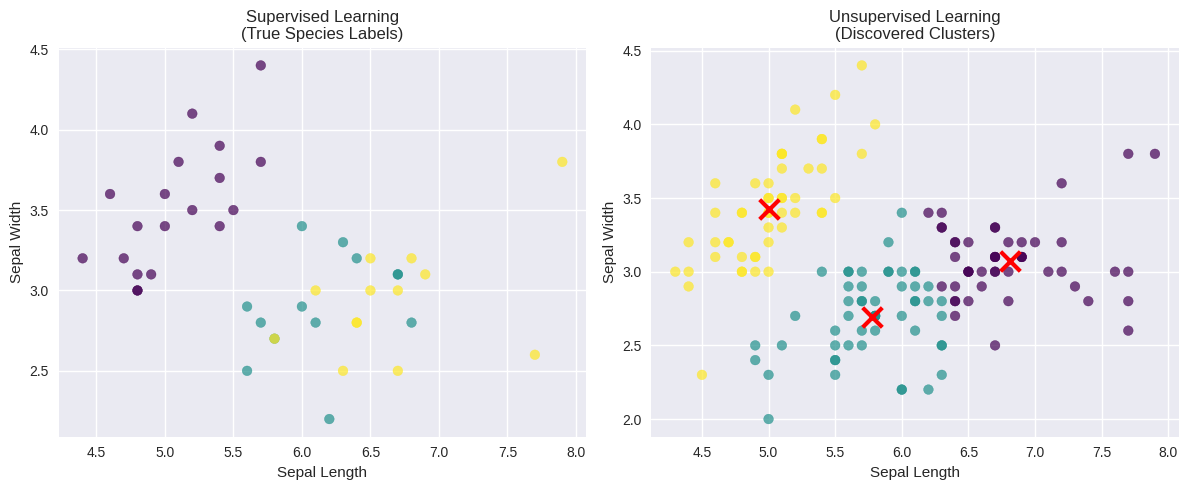


💡 Compare the two plots:
   Left: Uses known labels (supervised)
   Right: Discovers patterns without labels (unsupervised)


In [12]:
# Let's demonstrate supervised vs unsupervised learning
print("🎯 SUPERVISED LEARNING DEMO")
print("=" * 50)

# Prepare data for supervised learning
X = iris_df[['sepal length (cm)', 'sepal width (cm)']].values  # Features
y = iris_df['species'].values  # Labels (what we want to predict)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a supervised model (Logistic Regression)
supervised_model = LogisticRegression()
supervised_model.fit(X_train, y_train)  # Learn from labeled training data

# Make predictions on test data
predictions = supervised_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Supervised model accuracy: {accuracy:.2%}")
print(f"The model correctly predicted {accuracy:.1%} of species!")

print("\n🔍 UNSUPERVISED LEARNING DEMO")
print("=" * 50)

# Unsupervised learning: Find clusters without knowing species labels
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # We suspect 3 groups
clusters = kmeans.fit_predict(X)  # Find natural groupings

# Visualize the results
plt.figure(figsize=(12, 5))

# Supervised learning visualization
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.title('Supervised Learning\n(True Species Labels)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Unsupervised learning visualization
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           marker='x', s=200, linewidths=3, color='red')
plt.title('Unsupervised Learning\n(Discovered Clusters)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()

print("\n💡 Compare the two plots:")
print("   Left: Uses known labels (supervised)")
print("   Right: Discovers patterns without labels (unsupervised)")

### Guided Questions

**Reflection Time:** *(Allocate 2-3 min for discussion)*
- How do the clusters compare to the true species labels?
- What's the key difference between having labeled vs. unlabeled data?
- When might you use each approach?

**📖 For hands-on examples:** [Towards Data Science - ML Types](https://towardsdatascience.com/types-of-machine-learning-algorithms-you-should-know-953a08248861)

---

### 🎯 Exercise 2: Clustering Experiment

**Your Turn!** In the cell below, write 2-3 lines to:
1. Change the number of clusters in k-means to 4
2. Fit the model and get new cluster labels
3. Print the unique cluster labels

**Expected result:** You should see labels 0, 1, 2, 3 (four clusters)

In [13]:
# Your code here - create 4 clusters and print the labels



<details>
<summary><b>💡 Click here for solution</b></summary>

```python
# Create k-means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(X)
print(f"Unique cluster labels: {sorted(np.unique(labels_4))}")
print(f"Number of points in each cluster: {np.bincount(labels_4)}")
```
</details>

---

## Section 4: End-to-End ML Workflow (45-60 min)

### The 6-Step ML Process

Every ML project follows a similar workflow:

```
1. 🎯 Define Problem → 2. 📊 Collect Data → 3. 🔧 Prepare Features → 
4. 🤖 Train Model → 5. 📈 Evaluate Performance → 6. 🚀 Deploy
```

### Today's Use Case: House Price Prediction

**Problem:** Predict house prices based on features like size, location, and age
**Type:** Regression (predicting continuous values)
**Dataset:** Boston Housing (classic ML dataset)

### Key Principles:
- **Data Quality Matters:** Clean data leads to reliable models
- **Feature Engineering:** Selecting the right features is crucial
- **Iterative Process:** ML requires experimentation and refinement

**⚠️ Important:** Always check for bias in your data to ensure fair predictions!

---

🏠 Section 3: Regression Example - Predicting Housing Prices
📊 Step 1 - Data Loaded: 20640 houses, 8 features
   Features include: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']...
   Price range: $0.100k - $5.000k

🔍 Step 2 - Data Quality Check:
   Missing values: 0
   Data types: All numeric ✅

🔧 Step 3 - Feature Selection:
   Selected features: ['MedInc', 'HouseAge', 'AveRooms']
   MedInc: Median income in block group
   HouseAge: Median house age in block group
   AveRooms: Average number of rooms per household

🤖 Step 4 - Model Training:
   Algorithm: Linear Regression
   Training samples: 16512
   Model coefficients learned: [ 0.44  0.02 -0.03]

📈 Step 5 - Model Performance:
   R² Score: 0.497 (higher is better, max = 1.0)
   Mean Squared Error: 0.659
   This means our model explains 49.7% of price variation!

🔮 Step 6 - Making Predictions:
   For a house with features [8.0, 10.0, 6.0]:
   Predicted price: $3.600,000


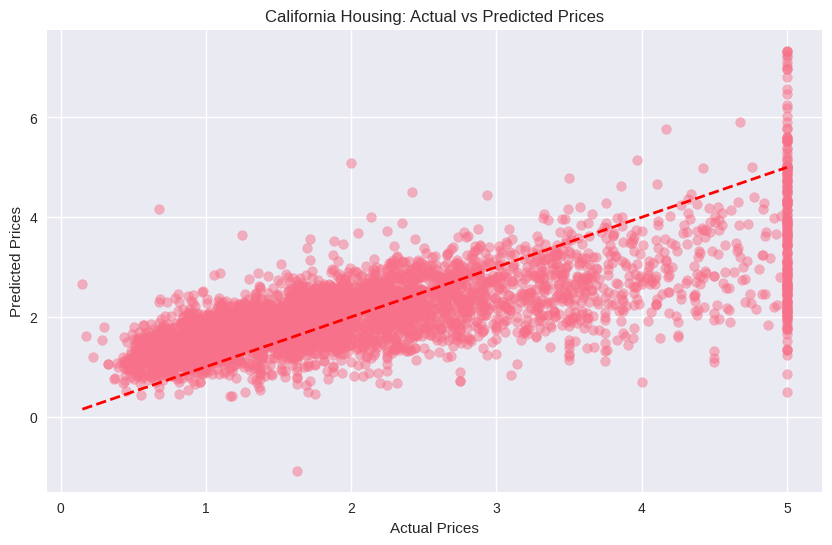


✅ Regression Complete! The model learned to predict house prices based on key features.


In [14]:
# Fixed version replacing load_boston with fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("🏠 Section 3: Regression Example - Predicting Housing Prices")
print("=" * 50)

# Step 1: Load the California Housing dataset (replacement for Boston Housing)
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['PRICE'] = housing.target  # Target variable (house prices in hundreds of thousands)

print(f"📊 Step 1 - Data Loaded: {housing_df.shape[0]} houses, {housing_df.shape[1]-1} features")
print(f"   Features include: {list(housing.feature_names[:5])}...")
print(f"   Price range: ${housing_df['PRICE'].min():.1f}00k - ${housing_df['PRICE'].max():.1f}00k")

# Step 2: Data Quality Check
print(f"\n🔍 Step 2 - Data Quality Check:")
print(f"   Missing values: {housing_df.isnull().sum().sum()}")
print(f"   Data types: All numeric ✅")

# Step 3: Feature Selection and Preparation
# Select a few key features for simplicity
features = ['MedInc', 'HouseAge', 'AveRooms']  # Median income, house age, average rooms
X = housing_df[features].values
y = housing_df['PRICE'].values

print(f"\n🔧 Step 3 - Feature Selection:")
print(f"   Selected features: {features}")
print(f"   MedInc: Median income in block group")
print(f"   HouseAge: Median house age in block group")
print(f"   AveRooms: Average number of rooms per household")

# Step 4: Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # This is where the "learning" happens!

print(f"\n🤖 Step 4 - Model Training:")
print(f"   Algorithm: Linear Regression")
print(f"   Training samples: {len(X_train)}")
print(f"   Model coefficients learned: {model.coef_.round(2)}")

# Step 5: Evaluate performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📈 Step 5 - Model Performance:")
print(f"   R² Score: {r2:.3f} (higher is better, max = 1.0)")
print(f"   Mean Squared Error: {mse:.3f}")
print(f"   This means our model explains {r2*100:.1f}% of price variation!")

# Step 6: Make a prediction
print(f"\n🔮 Step 6 - Making Predictions:")
sample_house = [[8.0, 10.0, 6.0]]  # High income, 10-year-old house, 6 rooms avg
predicted_price = model.predict(sample_house)[0]
print(f"   For a house with features {sample_house[0]}:")
print(f"   Predicted price: ${predicted_price:.1f}00,000")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('California Housing: Actual vs Predicted Prices')
plt.show()

print(f"\n✅ Regression Complete! The model learned to predict house prices based on key features.")


### Interactive Prompt

**Experiment Time:** Try modifying the code above:
- Remove the 'PTRATIO' feature and re-run
- How does the accuracy change?
- What does this tell you about feature importance?

This highlights the **iterative nature** of ML workflows.

**📖 Learn more:** [Real Python - ML Pipeline](https://realpython.com/python-machine-learning/)

---

### 🎯 Exercise 3: Build Your Own Predictor

**Your Turn!** In the cell below, write 3-5 lines to:
1. Select only two features: 'RM' and 'LSTAT'
2. Train a linear regression model on these features
3. Predict the price for a house with 7 rooms and 5% lower status

**Expected result:** A price prediction in the reasonable range ($20-50k)

In [15]:
# Your code here - build a 2-feature model and make a prediction



<details>
<summary><b>💡 Click here for solution</b></summary>

```python
# Select two features and train model
X_simple = boston_df[['RM', 'LSTAT']].values
simple_model = LinearRegression()
simple_model.fit(X_simple, y)

# Make prediction for house with 7 rooms, 5% lower status
prediction = simple_model.predict([[7.0, 5.0]])[0]
print(f"Predicted price: ${prediction:.1f}k")
```
</details>

---

## Section 5: Mini Case Study - Customer Churn Prediction (60-80 min)

### Real-World Scenario: Telecom Customer Retention

**Business Problem:** A telecom company wants to identify customers likely to cancel their service ("churn") so they can proactively offer retention incentives.

**ML Approach:** 
- **Type:** Classification (Will customer churn? Yes/No)
- **Features:** Usage patterns, tenure, demographics, service details
- **Goal:** Predict churn probability for each customer

### Key ML Concepts:
- **Binary Classification:** Predicting one of two outcomes
- **Confusion Matrix:** Shows correct vs. incorrect predictions
- **Business Impact:** ML predictions drive real business decisions

**Story Context:** Imagine you're a data scientist helping this company save millions by retaining valuable customers!

---

📞 CUSTOMER CHURN PREDICTION CASE STUDY
📊 Dataset Created: 1000 customers
   Churn rate: 22.8%
   Features: ['tenure_months', 'monthly_charges', 'total_charges', 'age', 'support_calls']

🔍 Customer Profile Summary:
       tenure_months  monthly_charges  total_charges     age  support_calls  \
count         1000.0           1000.0         1000.0  1000.0         1000.0   
mean            24.3             66.5         1606.7    44.9            1.9   
std             11.5             19.6          924.6    14.8            1.3   
min              1.0             20.0          -60.6    18.0            0.0   
25%             16.2             52.9          969.8    33.9            1.0   
50%             24.3             66.3         1476.6    45.0            2.0   
75%             31.8             79.6         2120.4    55.0            3.0   
max             60.0            120.0         5999.4    80.0            8.0   

       churned  
count   1000.0  
mean       0.2  
std        0.4  
min   

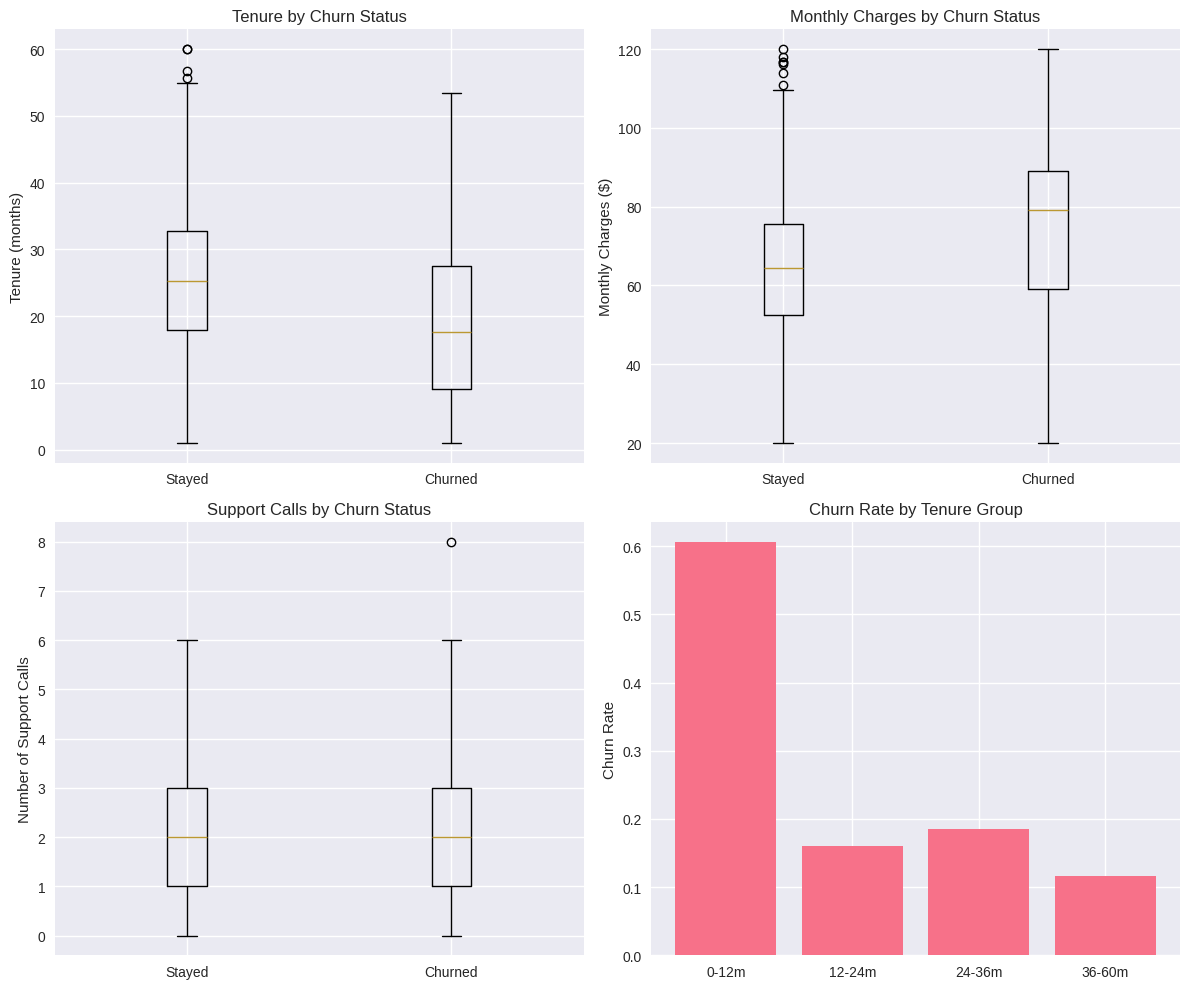


💡 Pattern Insights:
   📈 Newer customers (low tenure) churn more
   💰 Higher monthly charges correlate with churn
   📞 More support calls often indicate dissatisfaction


In [16]:
# Create a synthetic customer churn dataset for demonstration
print("📞 CUSTOMER CHURN PREDICTION CASE STUDY")
print("=" * 50)

# Generate synthetic customer data
np.random.seed(42)
n_customers = 1000

# Create realistic customer features
tenure_months = np.random.normal(24, 12, n_customers).clip(1, 60)  # 1-60 months
monthly_charges = np.random.normal(65, 20, n_customers).clip(20, 120)  # $20-120
total_charges = tenure_months * monthly_charges + np.random.normal(0, 100, n_customers)
age = np.random.normal(45, 15, n_customers).clip(18, 80)  # 18-80 years
support_calls = np.random.poisson(2, n_customers).clip(0, 10)  # 0-10 calls

# Create churn labels based on realistic patterns
# Higher churn probability for: short tenure, high charges, many support calls
churn_probability = (
    0.1 +  # Base churn rate
    0.4 * (tenure_months < 12) +  # New customers more likely to churn
    0.3 * (monthly_charges > 80) +  # High charges increase churn
    0.2 * (support_calls > 3)  # Many support calls indicate problems
).clip(0, 0.9)

churn = np.random.binomial(1, churn_probability, n_customers)

# Create DataFrame
churn_df = pd.DataFrame({
    'tenure_months': tenure_months,
    'monthly_charges': monthly_charges,
    'total_charges': total_charges,
    'age': age,
    'support_calls': support_calls,
    'churned': churn
})

print(f"📊 Dataset Created: {len(churn_df)} customers")
print(f"   Churn rate: {churn_df['churned'].mean():.1%}")
print(f"   Features: {list(churn_df.columns[:-1])}")

# Explore the data
print("\n🔍 Customer Profile Summary:")
print(churn_df.describe().round(1))

# Visualize churn patterns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Tenure vs Churn
axes[0,0].boxplot([churn_df[churn_df['churned']==0]['tenure_months'],
                   churn_df[churn_df['churned']==1]['tenure_months']], 
                  labels=['Stayed', 'Churned'])
axes[0,0].set_title('Tenure by Churn Status')
axes[0,0].set_ylabel('Tenure (months)')

# Monthly Charges vs Churn
axes[0,1].boxplot([churn_df[churn_df['churned']==0]['monthly_charges'],
                   churn_df[churn_df['churned']==1]['monthly_charges']], 
                  labels=['Stayed', 'Churned'])
axes[0,1].set_title('Monthly Charges by Churn Status')
axes[0,1].set_ylabel('Monthly Charges ($)')

# Support Calls vs Churn
axes[1,0].boxplot([churn_df[churn_df['churned']==0]['support_calls'],
                   churn_df[churn_df['churned']==1]['support_calls']], 
                  labels=['Stayed', 'Churned'])
axes[1,0].set_title('Support Calls by Churn Status')
axes[1,0].set_ylabel('Number of Support Calls')

# Churn Rate by Tenure Groups
churn_df['tenure_group'] = pd.cut(churn_df['tenure_months'], 
                                  bins=[0, 12, 24, 36, 60], 
                                  labels=['0-12m', '12-24m', '24-36m', '36-60m'])
churn_by_tenure = churn_df.groupby('tenure_group')['churned'].mean()
axes[1,1].bar(range(len(churn_by_tenure)), churn_by_tenure.values)
axes[1,1].set_title('Churn Rate by Tenure Group')
axes[1,1].set_ylabel('Churn Rate')
axes[1,1].set_xticks(range(len(churn_by_tenure)))
axes[1,1].set_xticklabels(churn_by_tenure.index)

plt.tight_layout()
plt.show()

print("\n💡 Pattern Insights:")
print("   📈 Newer customers (low tenure) churn more")
print("   💰 Higher monthly charges correlate with churn")
print("   📞 More support calls often indicate dissatisfaction")

🤖 BUILDING THE CHURN PREDICTION MODEL
📊 Model Performance:
   Accuracy: 81.5%
   Training samples: 800
   Test samples: 200


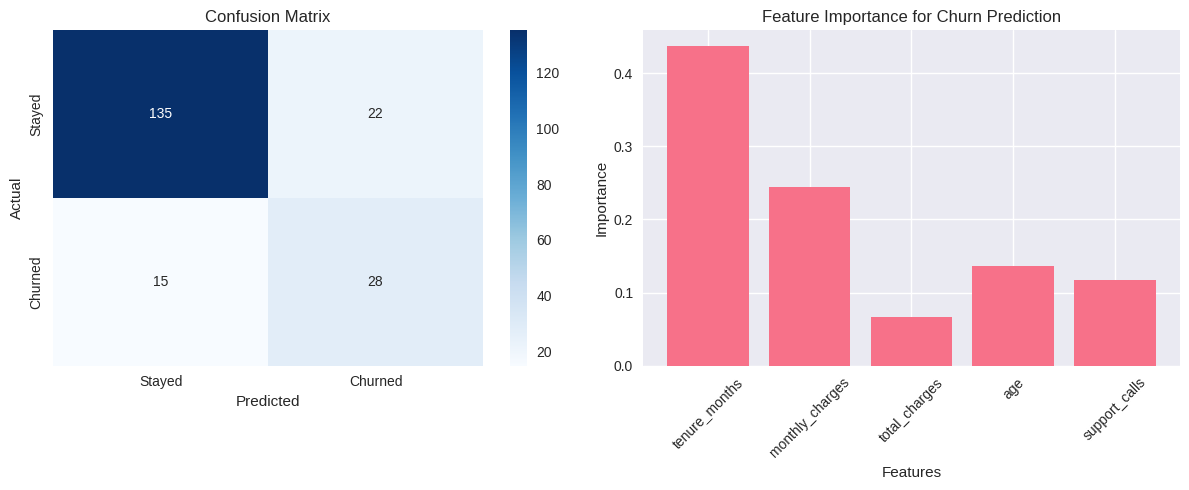


🎯 Confusion Matrix Interpretation:
   ✅ Correctly predicted to stay: 135
   ✅ Correctly predicted to churn: 28
   ❌ False alarms (predicted churn, but stayed): 22
   ❌ Missed churners (predicted stay, but churned): 15

💼 Business Impact:
   📈 Model identifies 28 real churners out of 43 total
   💰 Could potentially save $21,840 in annual revenue
   ⚠️  Would waste retention efforts on 22 false alarms

🔮 Example Predictions:
   Customer 1: 52.2% churn probability (HIGH risk)
   Customer 2: 6.8% churn probability (LOW risk)


In [17]:
# Build and evaluate the churn prediction model
print("🤖 BUILDING THE CHURN PREDICTION MODEL")
print("=" * 50)

# Prepare features and target
feature_columns = ['tenure_months', 'monthly_charges', 'total_charges', 'age', 'support_calls']
X = churn_df[feature_columns].values
y = churn_df['churned'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier (good for interpretability)
churn_model = DecisionTreeClassifier(max_depth=5, random_state=42)
churn_model.fit(X_train, y_train)

# Make predictions
y_pred = churn_model.predict(X_test)
y_pred_proba = churn_model.predict_proba(X_test)[:, 1]  # Probability of churning

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"   Accuracy: {accuracy:.1%}")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")

# Visualize results
plt.figure(figsize=(12, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Stayed', 'Churned'], 
           yticklabels=['Stayed', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance
plt.subplot(1, 2, 2)
importance = churn_model.feature_importances_
feature_names = feature_columns
plt.bar(range(len(importance)), importance)
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)

plt.tight_layout()
plt.show()

# Business interpretation
print(f"\n🎯 Confusion Matrix Interpretation:")
tn, fp, fn, tp = conf_matrix.ravel()
print(f"   ✅ Correctly predicted to stay: {tn}")
print(f"   ✅ Correctly predicted to churn: {tp}")
print(f"   ❌ False alarms (predicted churn, but stayed): {fp}")
print(f"   ❌ Missed churners (predicted stay, but churned): {fn}")

print(f"\n💼 Business Impact:")
print(f"   📈 Model identifies {tp} real churners out of {tp + fn} total")
print(f"   💰 Could potentially save ${tp * 65 * 12:,.0f} in annual revenue")
print(f"   ⚠️  Would waste retention efforts on {fp} false alarms")

# Demo: Predict for new customers
print(f"\n🔮 Example Predictions:")
new_customers = [
    [6, 90, 540, 35, 5],   # High risk: short tenure, high charges, many calls
    [36, 45, 1620, 50, 1], # Low risk: long tenure, reasonable charges, few calls
]

for i, customer in enumerate(new_customers, 1):
    churn_prob = churn_model.predict_proba([customer])[0, 1]
    risk_level = "HIGH" if churn_prob > 0.5 else "LOW"
    print(f"   Customer {i}: {churn_prob:.1%} churn probability ({risk_level} risk)")

### Poll and Takeaways

**Quick Poll:** *(Allocate 2-3 min for discussion)*
- Which feature do you think matters most for predicting churn?
- How might this company use these predictions?
- What are the risks of false positives vs. false negatives?

**Key Takeaways:**
- ML transforms business data into actionable insights
- Model interpretation is crucial for business decisions
- Understanding prediction errors helps optimize strategies

**📖 Try similar projects:** [Kaggle - Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)

---

### 🎯 Exercise 4: Data Splitting Practice

**Your Turn!** In the cell below, write 4-5 lines to:
1. Load a subset of the churn dataset (first 500 customers)
2. Split it into 80% training and 20% testing
3. Print the size of both training and testing sets

**Expected result:** Training set ~400 samples, testing set ~100 samples

In [18]:
# Your code here - split the dataset and show sizes



<details>
<summary><b>💡 Click here for solution</b></summary>

```python
# Load subset and split data
subset_df = churn_df.head(500)
X_subset = subset_df[feature_columns].values
y_subset = subset_df['churned'].values
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train_sub)}")
print(f"Testing set size: {len(X_test_sub)}")
```
</details>

---

## Section 6: Popular Algorithms - Quick Tour (80-95 min)

### High-Level Algorithm Overview

ML has many algorithms, each suited for different problems. Here are the most common ones:

#### 🔢 **Linear Regression**
- **Use:** Predicts continuous values (prices, temperatures)
- **How it works:** Finds the best line through data points
- **Example:** House price prediction

#### 🌳 **Decision Trees**
- **Use:** Classification and regression
- **How it works:** Makes decisions like a flowchart
- **Example:** "If age > 30 AND income > 50k, then approve loan"

#### 🎯 **k-Means Clustering**
- **Use:** Groups similar data points
- **How it works:** Finds cluster centers and assigns points
- **Example:** Customer segmentation

#### 🧠 **Neural Networks**
- **Use:** Complex pattern recognition
- **How it works:** Mimics brain neurons in layers
- **Example:** Image recognition, language processing

**Remember:** No single algorithm is "best" - it depends on your data and problem!

---

🧠 ALGORITHM COMPARISON DEMO
✅ Decision Tree (depth=3):
   Training accuracy: 82.9%
   Testing accuracy: 75.6%

✅ Decision Tree (depth=5):
   Training accuracy: 84.8%
   Testing accuracy: 75.6%

✅ Decision Tree (depth=10):
   Training accuracy: 94.3%
   Testing accuracy: 73.3%
   ⚠️  Possible overfitting detected!

✅ Logistic Regression:
   Training accuracy: 79.0%
   Testing accuracy: 82.2%



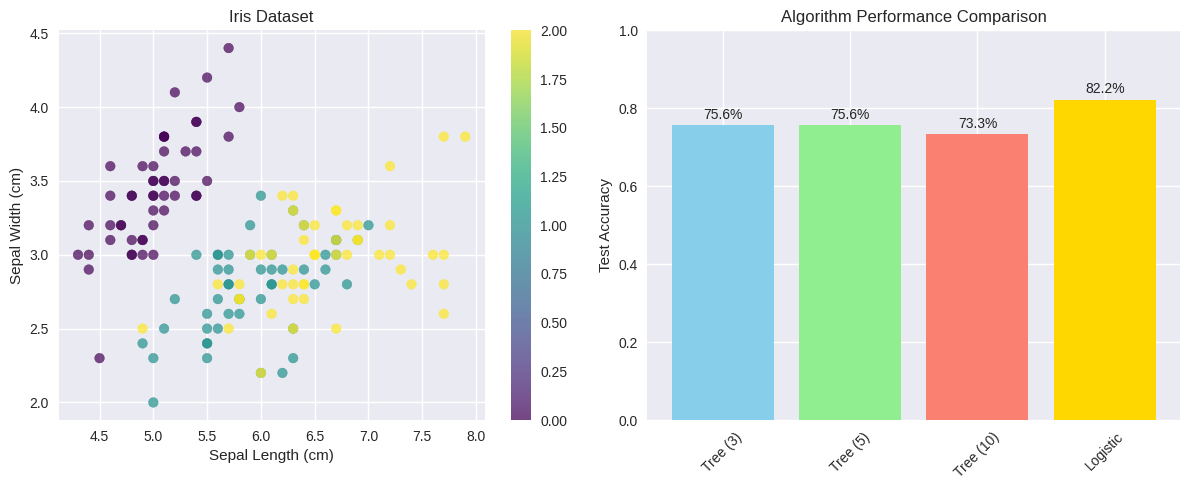

💡 Key Observations:
   🌳 Decision tree depth affects complexity and overfitting
   📊 Different algorithms can achieve similar performance
   ⚖️  Balance between model complexity and generalization

🎯 Decision Tree Feature Importance:
   Sepal Length: 0.723
   Sepal Width: 0.277

   🏆 Most important feature: Sepal Length


In [19]:
# Quick demonstration of different algorithms
print("🧠 ALGORITHM COMPARISON DEMO")
print("=" * 50)

# Use Iris dataset for comparison
X_iris = iris_df[['sepal length (cm)', 'sepal width (cm)']].values
y_iris = iris_df['species'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Test different algorithms
algorithms = {
    'Decision Tree (depth=3)': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Decision Tree (depth=5)': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Decision Tree (depth=10)': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

results = []
for name, algorithm in algorithms.items():
    # Train the algorithm
    algorithm.fit(X_train, y_train)
    
    # Evaluate performance
    train_accuracy = algorithm.score(X_train, y_train)
    test_accuracy = algorithm.score(X_test, y_test)
    
    results.append({
        'Algorithm': name,
        'Train Accuracy': f"{train_accuracy:.1%}",
        'Test Accuracy': f"{test_accuracy:.1%}"
    })
    
    print(f"✅ {name}:")
    print(f"   Training accuracy: {train_accuracy:.1%}")
    print(f"   Testing accuracy: {test_accuracy:.1%}")
    
    # Check for overfitting
    if train_accuracy - test_accuracy > 0.1:
        print(f"   ⚠️  Possible overfitting detected!")
    print()

# Visualize decision tree example
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(12, 5))

# Plot 1: Data points
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset')
plt.colorbar(scatter)

# Plot 2: Algorithm comparison
plt.subplot(1, 2, 2)
algorithms_short = ['Tree (3)', 'Tree (5)', 'Tree (10)', 'Logistic']
test_scores = [float(r['Test Accuracy'].strip('%'))/100 for r in results]
bars = plt.bar(algorithms_short, test_scores, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Algorithm Performance Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add value labels on bars
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("💡 Key Observations:")
print("   🌳 Decision tree depth affects complexity and overfitting")
print("   📊 Different algorithms can achieve similar performance")
print("   ⚖️  Balance between model complexity and generalization")

# Demo feature importance
print(f"\n🎯 Decision Tree Feature Importance:")
feature_names = ['Sepal Length', 'Sepal Width']
importance = tree_model.feature_importances_
for name, imp in zip(feature_names, importance):
    print(f"   {name}: {imp:.3f}")

most_important = feature_names[np.argmax(importance)]
print(f"\n   🏆 Most important feature: {most_important}")

### Experiment Prompt

**Try This:** Go back to the code above and:
- Change the tree depth to 1 or 2
- Re-run the comparison
- What happens to performance?

This demonstrates the **bias-variance tradeoff** - simpler models may underfit, complex models may overfit.

**📖 Explore more algorithms:** [Machine Learning Mastery - Algorithm Guide](https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/)

---

### 🎯 Exercise 5: Algorithm Tuning

**Your Turn!** In the cell below, write 2-3 lines to:
1. Create a decision tree with max_depth=2
2. Fit it to the iris training data
3. Print its accuracy score on the training data

**Expected result:** Accuracy between 0.8 and 1.0

In [20]:
# Your code here - create shallow tree and check accuracy



<details>
<summary><b>💡 Click here for solution</b></summary>

```python
# Create and train shallow decision tree
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
shallow_tree.fit(X_train, y_train)
accuracy = shallow_tree.score(X_train, y_train)
print(f"Shallow tree accuracy: {accuracy:.1%}")
```
</details>

---

## Section 7: Ethics, Explainability & Responsible AI (95-110 min)

### Key Ethical Concepts in ML

As ML becomes more powerful, we must consider its impact on society:

#### ⚖️ **Bias and Fairness**
- **Problem:** Biased training data leads to unfair decisions
- **Example:** Facial recognition working poorly for certain ethnic groups
- **Solution:** Diverse datasets, bias testing, fairness metrics

#### 🔍 **Explainability vs. Interpretability**
- **Explainability:** Understanding why a model made a specific prediction (post-hoc)
- **Interpretability:** Models that are transparent by design (e.g., decision trees)
- **Importance:** Builds trust, enables debugging, meets regulatory requirements

#### 🔒 **Privacy and Security**
- **Concerns:** Protecting sensitive data, preventing model attacks
- **Methods:** Differential privacy, federated learning, secure aggregation

#### 📋 **Accountability**
- **Questions:** Who is responsible for ML decisions? How do we audit systems?
- **Approaches:** Clear documentation, human oversight, regular audits

**Golden Rule:** Always ask "Who might be harmed by this model, and how can we prevent it?"

---

🔍 MODEL EXPLAINABILITY & BIAS ANALYSIS
📊 Feature Importance Analysis:
Top factors influencing churn predictions:
   1. Tenure Months: 0.437
   2. Monthly Charges: 0.245
   3. Age: 0.136
   4. Support Calls: 0.117
   5. Total Charges: 0.066


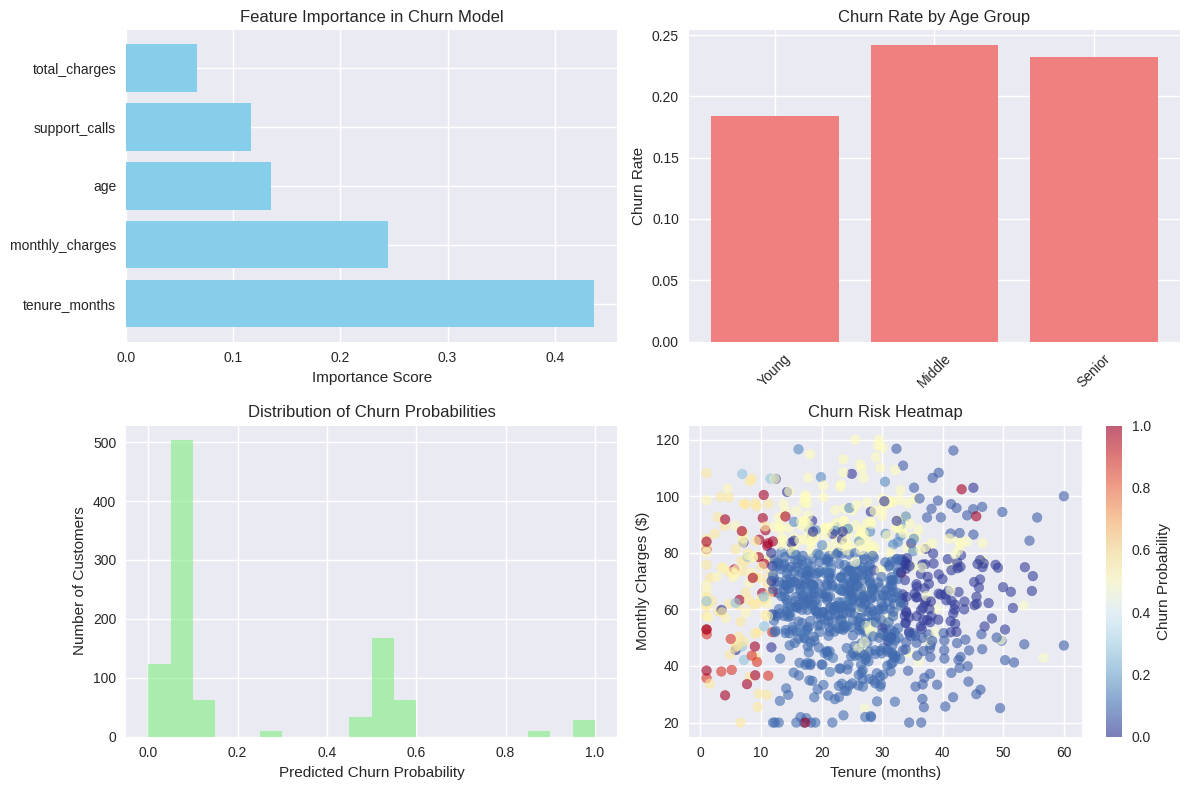


⚖️ Bias Analysis Results:
   Young customers: 18.4% churn rate ✅ Similar to average
   Middle customers: 24.2% churn rate ✅ Similar to average
   Senior customers: 23.2% churn rate ✅ Similar to average

🎯 Explainability Insights:
   🏆 Most predictive factor: Tenure Months
   📈 Model focuses on customer behavior patterns
   🔍 Clear business logic: unhappy customers call support more

🔮 Individual Prediction Explanation:
Customer Profile:
   Tenure Months: 22.6
   Monthly Charges: 86.6
   Total Charges: 1905.2
   Age: 36.2
   Support Calls: 1.0

Predicted churn probability: 50.4%
Risk level: HIGH

Key factors for this prediction:
   📈 Tenure Months: Increases churn risk
   📈 Monthly Charges: Increases churn risk
   📈 Age: Increases churn risk


In [21]:
# Demonstrate model explainability and bias detection
print("🔍 MODEL EXPLAINABILITY & BIAS ANALYSIS")
print("=" * 50)

# Use our churn model for explainability demo
feature_names = ['tenure_months', 'monthly_charges', 'total_charges', 'age', 'support_calls']

print("📊 Feature Importance Analysis:")
print("=" * 30)

# Get feature importance from our trained churn model
importance_scores = churn_model.feature_importances_
feature_importance = list(zip(feature_names, importance_scores))
feature_importance.sort(key=lambda x: x[1], reverse=True)

print("Top factors influencing churn predictions:")
for i, (feature, importance) in enumerate(feature_importance, 1):
    print(f"   {i}. {feature.replace('_', ' ').title()}: {importance:.3f}")
    
# Visualize feature importance
plt.figure(figsize=(12, 8))

# Feature importance plot
plt.subplot(2, 2, 1)
features_sorted = [f[0] for f in feature_importance]
importance_sorted = [f[1] for f in feature_importance]
plt.barh(features_sorted, importance_sorted, color='skyblue')
plt.title('Feature Importance in Churn Model')
plt.xlabel('Importance Score')

# Bias analysis: Check predictions by age groups
plt.subplot(2, 2, 2)
churn_df['age_group'] = pd.cut(churn_df['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Senior'])
age_churn_rates = churn_df.groupby('age_group')['churned'].mean()
plt.bar(age_churn_rates.index, age_churn_rates.values, color='lightcoral')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)

# Model predictions distribution
plt.subplot(2, 2, 3)
predictions_proba = churn_model.predict_proba(X)[:, 1]
plt.hist(predictions_proba, bins=20, alpha=0.7, color='lightgreen')
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Predicted Churn Probability')
plt.ylabel('Number of Customers')

# Decision boundary visualization
plt.subplot(2, 2, 4)
# Focus on two key features for visualization
scatter = plt.scatter(churn_df['tenure_months'], churn_df['monthly_charges'], 
                     c=predictions_proba, cmap='RdYlBu_r', alpha=0.6)
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.title('Churn Risk Heatmap')
plt.colorbar(scatter, label='Churn Probability')

plt.tight_layout()
plt.show()

# Bias detection analysis
print(f"\n⚖️ Bias Analysis Results:")
print("=" * 25)

for age_group in age_churn_rates.index:
    rate = age_churn_rates[age_group]
    overall_rate = churn_df['churned'].mean()
    bias_ratio = rate / overall_rate
    
    if bias_ratio > 1.2:
        status = "⚠️  Higher risk group"
    elif bias_ratio < 0.8:
        status = "✅ Lower risk group"
    else:
        status = "✅ Similar to average"
    
    print(f"   {age_group} customers: {rate:.1%} churn rate {status}")

print(f"\n🎯 Explainability Insights:")
print("=" * 25)
top_feature = feature_importance[0][0].replace('_', ' ').title()
print(f"   🏆 Most predictive factor: {top_feature}")
print(f"   📈 Model focuses on customer behavior patterns")
print(f"   🔍 Clear business logic: unhappy customers call support more")

# Example of individual prediction explanation
print(f"\n🔮 Individual Prediction Explanation:")
print("=" * 35)

# Take a specific customer example
customer_idx = 42
customer_data = X[customer_idx]
customer_prediction = churn_model.predict_proba([customer_data])[0, 1]

print(f"Customer Profile:")
for feature, value in zip(feature_names, customer_data):
    print(f"   {feature.replace('_', ' ').title()}: {value:.1f}")

print(f"\nPredicted churn probability: {customer_prediction:.1%}")
risk_level = "HIGH" if customer_prediction > 0.5 else "MEDIUM" if customer_prediction > 0.3 else "LOW"
print(f"Risk level: {risk_level}")

# Simple explanation based on feature importance
print(f"\nKey factors for this prediction:")
for feature, value in zip(feature_names, customer_data):
    feature_idx = feature_names.index(feature)
    contribution = importance_scores[feature_idx] * (value / np.mean(X[:, feature_idx]))
    if contribution > 0.1:
        print(f"   📈 {feature.replace('_', ' ').title()}: Increases churn risk")
    elif contribution < -0.1:
        print(f"   📉 {feature.replace('_', ' ').title()}: Decreases churn risk")

### Reflection and Discussion

**Critical Questions:** *(Allocate 3-4 min for discussion)*

1. **Bias Detection:** Did you notice any concerning patterns in the age group analysis?
2. **Fairness:** Should all age groups have the same churn rates? Why or why not?
3. **Transparency:** How important is it for customers to understand why they're flagged as "high churn risk"?
4. **Business Ethics:** What if the model is wrong about a loyal customer?

### Real-World Considerations:
- **Healthcare:** Biased diagnostic tools can worsen health disparities
- **Hiring:** Unfair recruiting algorithms can perpetuate workplace inequality
- **Criminal Justice:** Biased risk assessment tools can lead to unjust sentencing
- **Finance:** Discriminatory loan approval can deny opportunities

**📖 Deep dive into ML ethics:** [MIT Technology Review - AI Ethics](https://www.technologyreview.com/2020/12/04/1013068/artificial-intelligence-machine-learning-bias-algorithmic/)

---

### 🎯 Exercise 6: Feature Importance Analysis

**Your Turn!** In the cell below, write 3-4 lines to:
1. Extract feature importances from our churn model
2. Sort them in descending order
3. Print the top 3 most important features with their scores

**Expected result:** A ranked list of the 3 most predictive features

In [22]:
# Your code here - extract and rank feature importances



<details>
<summary><b>💡 Click here for solution</b></summary>

```python
# Extract and sort feature importances
importances = churn_model.feature_importances_
feature_rankings = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Top 3 most important features:")
for i, (feature, importance) in enumerate(feature_rankings[:3], 1):
    print(f"{i}. {feature}: {importance:.3f}")
```
</details>

---

## Section 8: Wrap-Up & Next Steps (110-120 min)

### 🎯 Key Takeaways

**Congratulations!** You've completed your introduction to machine learning. Here's what you've learned:

#### Core Concepts:
- **ML Definition:** Computers learning from data to make predictions without explicit programming
- **Three Types:** Supervised (labeled data), Unsupervised (patterns), Reinforcement (trial-and-error)
- **Workflow:** Problem → Data → Features → Model → Evaluate → Deploy
- **Ethics:** Ensure fairness, explainability, and accountability in AI systems

#### Practical Skills:
- ✅ Loading and exploring datasets
- ✅ Training classification and regression models
- ✅ Evaluating model performance
- ✅ Interpreting feature importance
- ✅ Detecting potential bias

#### Business Applications:
- 🏠 **Real Estate:** Predicting house prices
- 📞 **Telecom:** Customer churn prevention
- 🌸 **Biology:** Species classification
- 🎯 **Marketing:** Customer segmentation

---

### 🚀 Continue Your ML Journey

#### **Free Learning Resources:**

**📚 Courses:**
- [freeCodeCamp ML Course](https://www.freecodecamp.org/learn/machine-learning-with-python/) - Comprehensive hands-on curriculum
- [Coursera - Machine Learning by Andrew Ng](https://www.coursera.org/learn/machine-learning) - Classic foundational course
- [Fast.ai Practical Deep Learning](https://course.fast.ai/) - Top-down, practical approach

**🛠️ Practice Platforms:**
- [Kaggle Learn](https://www.kaggle.com/learn) - Micro-courses with datasets
- [Google Colab](https://colab.research.google.com/) - Free Jupyter notebooks in the cloud
- [Papers With Code](https://paperswithcode.com/) - Latest research with implementation

**📖 Documentation:**
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html) - Comprehensive ML library docs
- [Pandas Documentation](https://pandas.pydata.org/docs/) - Data manipulation essentials
- [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html) - Data visualization

#### **Next Steps Roadmap:**

**Week 1-2:** Practice with Kaggle competitions
**Week 3-4:** Build your first end-to-end project
**Month 2:** Explore deep learning with TensorFlow/PyTorch
**Month 3:** Specialize in your area of interest (NLP, Computer Vision, etc.)

#### **Project Ideas to Try:**
- 🎬 Movie recommendation system
- 📈 Stock price prediction
- 🗣️ Sentiment analysis of social media
- 🖼️ Image classification with your own photos
- 🏥 Healthcare data analysis

---

### 🤝 Q&A Session

**Your Questions Welcome!** *(Remaining time for discussion)*

Common questions we can address:
- How do I choose the right algorithm for my problem?
- What's the difference between AI, ML, and deep learning?
- How much math do I need to know for ML?
- What programming skills should I develop next?
- How can I apply ML to my current work?
- What are the career opportunities in ML?

---

### 🎊 Thank You!

**You've taken your first step into the exciting world of machine learning!** 

Remember:
- Start with simple projects and gradually increase complexity
- Focus on understanding the problem before choosing algorithms
- Always consider the ethical implications of your models
- The ML community is welcoming - don't hesitate to ask questions!

**Happy learning, and welcome to the ML community!** 🚀🤖

---

*This notebook was designed to be your launching pad into machine learning. Bookmark it, refer back to it, and most importantly - keep experimenting!*